In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
eye = np.fromfile('/tmp/dslwpb_eye.c64', dtype = 'complex64').reshape((-1,16))

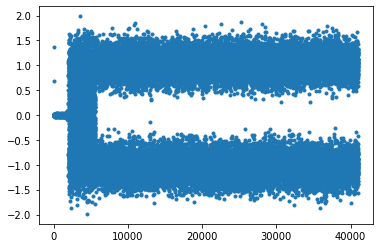

In [3]:
plt.plot(eye[:,-1].real, '.')

In [4]:
sel = slice(10000,40000)

In [5]:
eye_I = np.concatenate((eye[sel][:-1].real, eye[sel][1:].real), axis = 1)
eye_Q = np.concatenate((eye[sel][:-2,8:].imag, eye[sel][1:-1].imag, eye[sel][2:,:-8].imag), axis = 1)

In [6]:
def plot_eye(eye):
    heatmap = np.vstack([np.histogram(eye[:,j], bins = np.linspace(-2,2,100))[0]/eye_I.shape[0] for j in np.arange(eye_I.shape[1])]).T
    
    heatmap_cum = np.zeros_like(heatmap)
    ps = np.concatenate((np.logspace(-3,-1,3), [0.25,0.5,0.75]))
    for p in ps:
        levels = -np.sort(-heatmap, axis = 0)
        a = np.argmax(np.cumsum(levels, axis = 0) >= 1-p, axis = 0)
        cut = levels[a, np.arange(levels.shape[1])]
        heatmap_cum[heatmap >= cut] = p
    
    plt.figure(figsize = (10,6), facecolor = 'w')
    plt.plot(eye[:1000,:].T, color = 'C0', alpha = 0.1)
    
    plt.figure(figsize = (10,6), facecolor = 'w')
    plt.imshow(heatmap, extent = [0,eye.shape[1],-2,2], aspect = 'auto', interpolation = 'bicubic')
    
    plt.figure(figsize = (12,6), facecolor = 'w')
    plt.contourf(heatmap_cum, levels = ps, cmap = 'viridis')
    plt.colorbar()

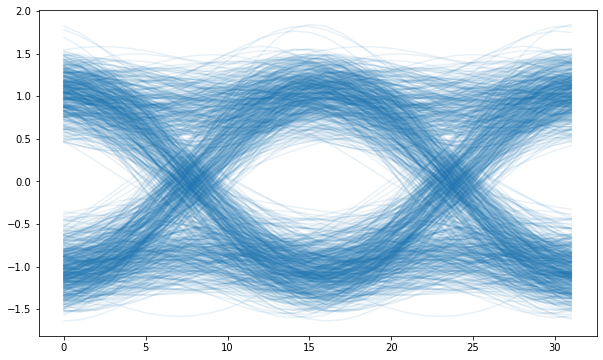

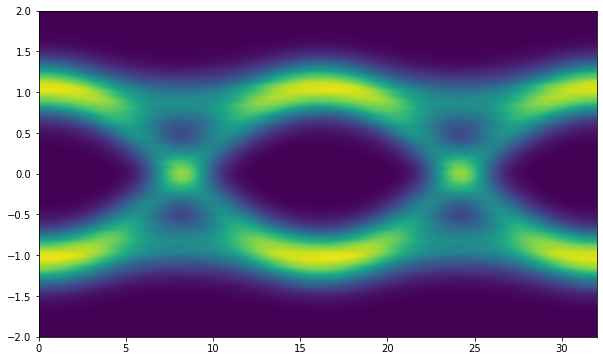

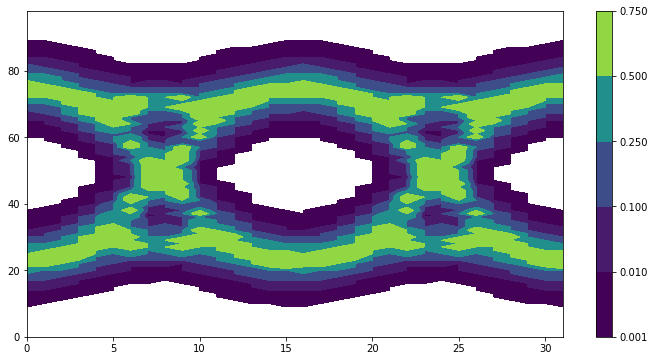

In [7]:
plot_eye(eye_I)

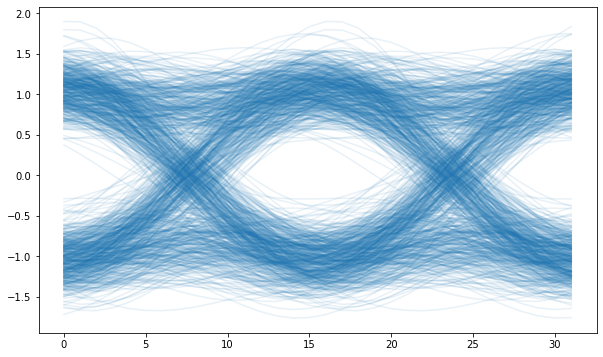

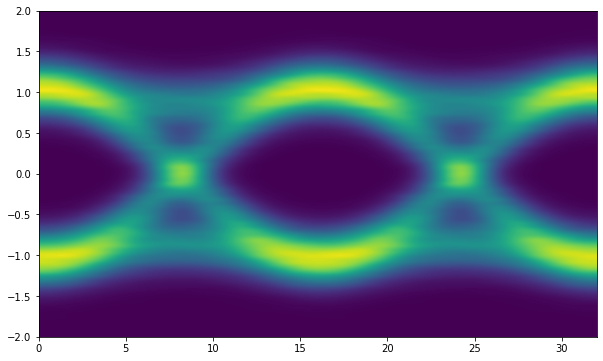

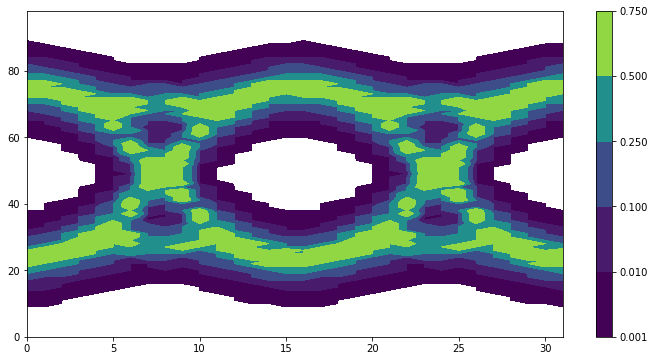

In [8]:
plot_eye(eye_Q)